In [1]:
# Import modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
digits = datasets.load_digits()

In [2]:
# Create data and label arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

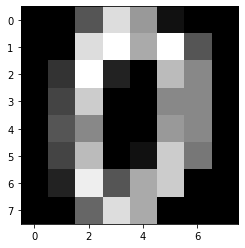

In [3]:
plt.imshow(X[0].reshape((8, 8)), cmap='gray')

# KNN

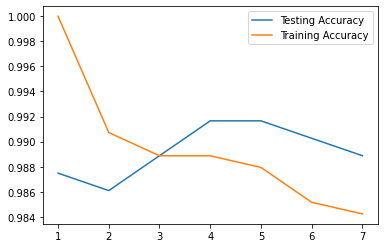

In [4]:
number_neighbors = []
testing_scores = []
training_scores = []

# For loop: we loop 8 times as the number of neighbours:
for k in range(1, 8):
    kNN = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', leaf_size=30, 
                                p=2, metric='minkowski', metric_params=None, n_jobs=None)  # Setting the number of neighbors
    kNN.fit(X_train, y_train)  # Fitting the classifier to training data
    number_neighbors.append(k)
    training_scores.append(kNN.score(X_train, y_train))  # Scoring on training data
    testing_scores.append(kNN.score(X_test, y_test))  # Scoring on testing data
    
plt.plot(number_neighbors, testing_scores, label="Testing Accuracy")
plt.plot(number_neighbors, training_scores, label="Training Accuracy")
plt.legend()
plt.show()

# Kernels

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel=kernel)  # Specifying the kernel
    svm.fit(X_train, y_train)  # Fitting the classifier to training data
    y_pred = svm.predict(X_test)  # Predicting on test data
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))  # Printing classification report

Kernel: linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.96      0.99      0.97        72
           2       1.00      1.00      1.00        66
           3       0.99      0.97      0.98        71
           4       0.97      1.00      0.99        78
           5       0.98      0.98      0.98        83
           6       1.00      1.00      1.00        69
           7       0.99      0.99      0.99        71
           8       0.98      0.94      0.96        65
           9       0.97      0.97      0.97        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719

Kernel: poly
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.97      1.00      0.99        72
           2       1.00      1.00      1.00       

# Naive Bayes

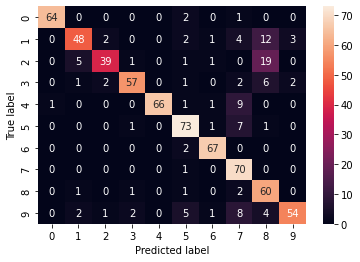

In [6]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)  # Fitting the classifier to training data
y_pred = bayes.predict(X_test)  # Predicting on test data
conf_matrix = confusion_matrix(y_test, y_pred)  # Calculating confusion matrix

# Visualizing confusion matrix using seaborn heatmap
ax = sns.heatmap(conf_matrix, annot=True, fmt='d')
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.show()

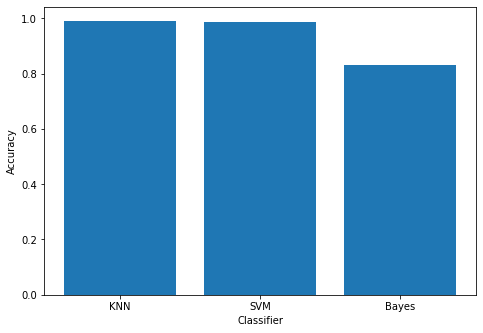

In [7]:
scores = []
labels = ["KNN", "SVM", "Bayes"]
classifiers = [
    KNeighborsClassifier(n_neighbors=5),  # Example kNN classifier with 5 neighbors
    SVC(kernel='rbf'),  # Example SVM classifier with RBF kernel
    GaussianNB()  # Example Gaussian Naive Bayes classifier
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)  # Fitting the classifier to training data
    score = classifier.score(X_test, y_test)  # Scoring the classifier on testing data
    scores.append(score)

# Plotting the accuracies
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,scores)
ax.set_xlabel("Classifier")
ax.set_ylabel("Accuracy")
plt.show()

# 2.Regression 

In [8]:
df = pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


<AxesSubplot:>

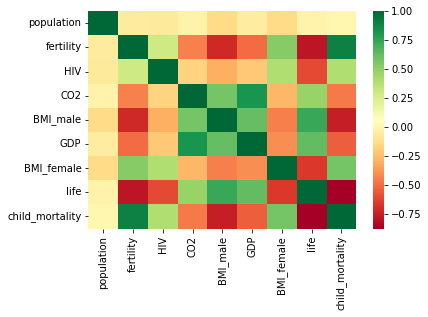

In [9]:
sns.heatmap(df.corr(),cmap="RdYlGn")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.6192442167740035


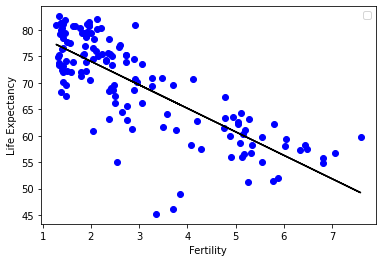

In [10]:
x1 = df["fertility"].values.reshape(-1, 1)  # Reshape x to a 2D array
y1 = df["life"]

# Create and fit the linear regression model
regression = LinearRegression()
regression.fit(x1, y1)

# Calculate the R^2 score of the regression model
r_squared = regression.score(x1, y1)
print(r_squared)

# Plot the data points
plt.scatter(x1, y1, color='blue')

# Plot the regression line
plt.plot(x1, regression.predict(x1), color='black')

# Add labels and legend
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")
plt.legend()

# Show plot
plt.show()

In [11]:
x2 = df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y2 = df["life"]

# Create and fit the linear regression model
regression_all = LinearRegression()
regression_all.fit(x2, y2)

# Calculate the R^2 score of the regression model
r_squared = regression_all.score(x2, y2)
print(r_squared)

0.8974995317332959


In [12]:
cv1=cross_val_score(regression,x1,y1,cv=5)
cv2=cross_val_score(regression_all,x2,y2,cv=5)
print(cv1)
print(cv2)

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
[0.81621881 0.8322471  0.90868335 0.81325568 0.94404223]


# Logistic Regression

In [13]:
# Load creditcard
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


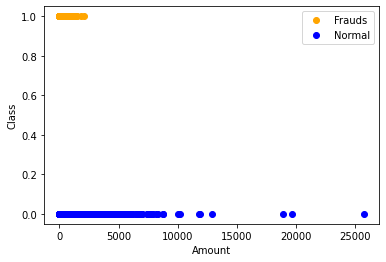

In [14]:
import pandas as pd

# Assuming 'data' is your DataFrame containing transaction data

# Initialize frauds and non_frauds
frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0]

# Now you can plot the data
import matplotlib.pyplot as plt

plt.plot(frauds['Amount'], frauds['Class'], 'o', color="orange", label="Frauds")
plt.plot(non_frauds['Amount'], non_frauds['Class'], 'bo', label="Normal")
plt.xlabel("Amount")
plt.ylabel("Class")
plt.legend()
plt.show()

C:\Users\Pavan Adithya Varma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(33.0, 0.5, 'True label')

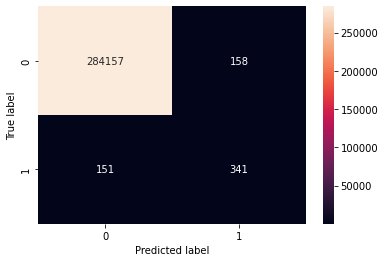

In [15]:
# Logistic Regression
X = df.drop("Class", axis=1)
y = df.Class

log_regression = LogisticRegression()
log_regression.fit(X, y)
y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, fmt="d")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")